In [1]:
import pandas as pd
import numpy as np
import re
import json
import math
from collections import defaultdict
import pymorphy2

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
import matplotlib.pyplot as plt

import tqdm as tqdm


убрал ненужный столбец

In [3]:
data = pd.read_csv('..\\supposedly_final_lemmatized_cut(08.05).csv') 
data = data.drop(columns=['Unnamed: 0'])
data.head(3)





auc_id         target  \
0  102200001621000055    гематология   
1  102200001621000086  бактериология   
2  102200001621000199            пцр   

                                            auc_name  \
0  поставка реагент автоматический гематологическ...   
1  поставка реагент автоматический гематологическ...   
2  поставка расходный материал анализатор кислотн...   

                                     trade_obj_descr  
0  наименование объект закупка начальный максимал...  
1  п п наименование товар технический требование ...  
2  наименование технический требование ед изм кол...

In [9]:
f = open('..\\stopwords.json', encoding = 'UTF-8')
stopwords = json.load(f)
print(type(stopwords))

<class 'list'>


сунул всё в списки, убрал пустые // чистка

In [6]:
trade_obj_descr_list = data.trade_obj_descr.values.tolist()
target_list = data.target.values.tolist()

# for i in range (len(order_name_list)):
#    order_name_list[i] = str(order_name_list[i])

# morph = pymorphy2.MorphAnalyzer(result_type=None)
# def lemmatize(word):
#    if morph.word_is_known(word):
#        return morph.parse(word)[0][2]
#    return word

# for i in range (len(order_name_list)):
#    for word in range (len(order_name_list[i])):
#       word = [lemmatize(word) for word in order_name_list[i]]

newdata = pd.DataFrame(list(zip(trade_obj_descr_list, target_list)), columns =['trade_obj_descr', 'target'])



In [7]:
newdata = newdata.dropna()
newdata = newdata[newdata.target != "other"]

newdata["trade_obj_descr"] = newdata["trade_obj_descr"].str.lower()
newdata["target"] = newdata["target"].str.lower()

newdata["trade_obj_descr"] = newdata["trade_obj_descr"].str.replace(r'[^\w\s]+', '')
newdata["target"] = newdata["target"].str.replace('-', ' ')
newdata["target"] = newdata["target"].str.replace(r'[^\w\s]+', '')

newdata = newdata.drop_duplicates(subset = 'trade_obj_descr')


# conditions = [(newdata["target"] == "биохимия"), 
#               (newdata["target"] == "ифа"),
#               (newdata["target"] == "пцр"),
#               (newdata["target"] == "бактериология"),
#               (newdata["target"] == "гематология"),
#               (newdata["target"] == "гемостаз и коа"),
#               (newdata["target"] == "гкиэ"),
#               (newdata["target"] == "моча"),
#               (newdata["target"] == "гематология"),
#               (newdata["target"] == "иммуногематология")]
# choices = [1,2,3,4,5,6,7,8,9,10]
# newdata['index'] = np.select(conditions, choices, default='hui')

C:\Users\griborod\AppData\Local\Temp\ipykernel_4996\4023261206.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  newdata["trade_obj_descr"] = newdata["trade_obj_descr"].str.replace(r'[^\w\s]+', '')
C:\Users\griborod\AppData\Local\Temp\ipykernel_4996\4023261206.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  newdata["target"] = newdata["target"].str.replace(r'[^\w\s]+', '')


In [ ]:
# new_order_name_list = newdata.order_name.values.tolist()
# new_target_list = newdata.target.values.tolist()

# d = defaultdict(set)
# for new_target in new_target_list:
#     for new_order_name in new_order_name_list:
#         d[new_target].add(new_order_name)
# print(d)


# #newnewdata = pd.DataFrame.from_dict(d, orient='index', columns=['target', 'order_name'])
# #print(newnewdata)


In [ ]:
# arr = []
# for key in d:
#     for value in d[key]:
#         arr.append([key, value])

# newdata = pd.DataFrame(arr, columns =['target', 'order_name'])

In [19]:
print(newdata)
#newdata.to_csv('cleaned_dataset.csv')
#data.to_csv('raw_dataset.csv')

                                       trade_obj_descr             target
0    наименование объекта закупки начальная максима...        гематология
1    раздел наименование раздела документации элект...      бактериология
2    раздел наименование раздела документации элект...                пцр
3    раздел наименование раздела документации элект...               моча
4    раздел наименование раздела документации элект...      бактериология
..                                                 ...                ...
554  наименование показатели определения соответств...               гкиэ
555  наименование показатели определения соответств...           биохимия
556  п п наименование товара характеристика товара ...  иммуногематология
557  п п наименование товара товарный знак наличии ...                ифа
558  п п наименование товара окпд характеристики то...      бактериология

[548 rows x 2 columns]


Raw vectorization sklearn

In [10]:
def TfIdfVectorize(data):
    TfIdf_Vectorizer=TfidfVectorizer(use_idf=True, 
                                    max_df=0.9, 
                                    sublinear_tf=True, 
                                    strip_accents="unicode", 
                                    analyzer="word", 
                                    token_pattern=r"\w{1,}", 
                                    ngram_range=(1,1),
                                    stop_words=stopwords)
    VectorizedData = TfIdf_Vectorizer.fit_transform(data)
    return VectorizedData, TfIdf_Vectorizer

train_data, markers = data["trade_obj_descr"].values.astype('U'), data["target"].values.astype('U')
train_data_tfidf, _ = TfIdfVectorize(train_data)
train_data_tfidf.shape





c:\Users\griborod\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['белыи', 'большои', 'важныи', 'воина', 'восемнадцатыи', 'восьмои', 'второи', 'выити', 'главныи', 'далекии', 'двадцатыи', 'двенадцатыи', 'девятнадцатыи', 'девятыи', 'деиствительно', 'десятыи', 'должныи', 'другои', 'еи', 'каждыи', 'какои', 'которои', 'которыи', 'маленькии', 'многочисленныи', 'мнои', 'мое', 'наити', 'неи', 'некоторыи', 'никакои', 'новыи', 'нужныи', 'одиннадцатыи', 'однои', 'первыи', 'подоиди', 'пожалуиста', 'поити', 'последнии', 'пятнадцатыи', 'пятыи', 'русскии', 'самои', 'самыи', 'своеи', 'сеаои', 'седьмои', 'сеичас', 'семнадцатыи', 'случаи', 'собои', 'советскии', 'старыи', 'такои', 'твое', 'тобои', 'третии', 'тринадцатыи', 'хорошии', 'хотел', 'четвертыи', 'четырнадцатыи', 'шестнадцатыи', 'шестои', 'этои'] not in stop_words.
  warnings.warn(


(558, 8101)

TSNE

raw

c:\Users\griborod\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\griborod\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Axes: title={'center': 'TSNE Projection of 558 Documents'}>

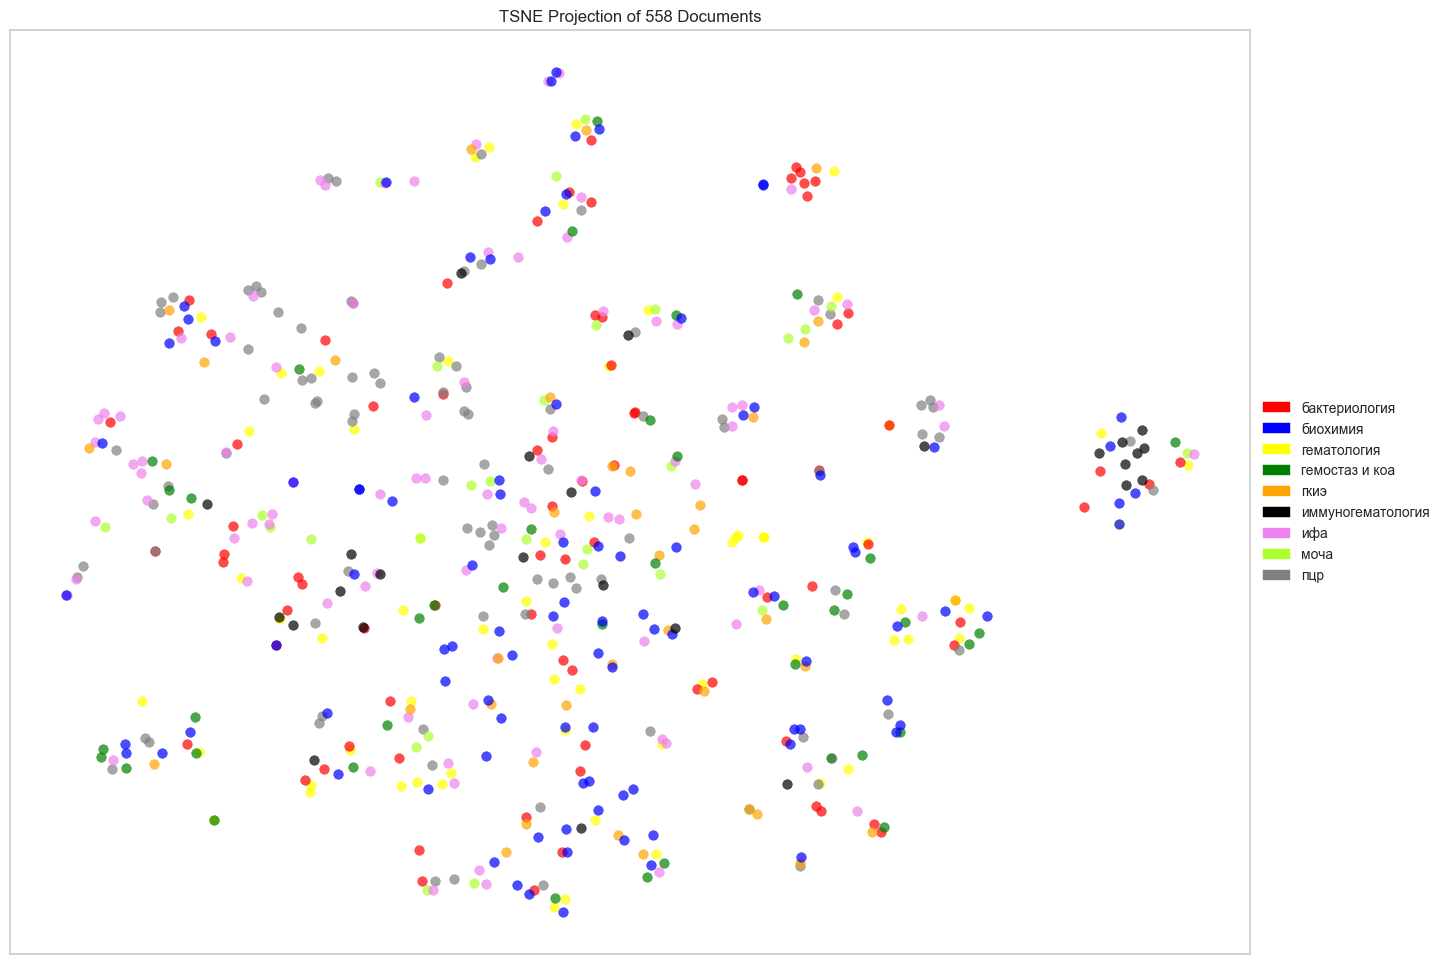

In [11]:
_, ax = plt.subplots(figsize=(20,12))
# colors for different classes
colors = [
'red', 
'blue', 
'yellow', 
'green', 
'orange', 
'black', 
'violet', 
'greenyellow', 
'gray', 
'purple',
]
x = train_data_tfidf #  tfidf-ed data
y = data["target"]  # target labels from dataset
tsne = TSNEVisualizer(ax, random_state=17, colors=colors) #, perplexity=40, init='pca', n_iter=2500
tsne.fit(x, y)
tsne.show(outpath="tsne_half_data_cut.png")


with preprocessing (no lemmatization)

In [13]:
new_train_data, markers = newdata["trade_obj_descr"].values.astype('U'), newdata["target"].values.astype('U')
new_train_data_tfidf, _ = TfIdfVectorize(new_train_data)
new_train_data_tfidf.shape

c:\Users\griborod\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['белыи', 'большои', 'важныи', 'воина', 'восемнадцатыи', 'восьмои', 'второи', 'выити', 'главныи', 'далекии', 'двадцатыи', 'двенадцатыи', 'девятнадцатыи', 'девятыи', 'деиствительно', 'десятыи', 'должныи', 'другои', 'еи', 'каждыи', 'какои', 'которои', 'которыи', 'маленькии', 'многочисленныи', 'мнои', 'мое', 'наити', 'неи', 'некоторыи', 'никакои', 'новыи', 'нужныи', 'одиннадцатыи', 'однои', 'первыи', 'подоиди', 'пожалуиста', 'поити', 'последнии', 'пятнадцатыи', 'пятыи', 'русскии', 'самои', 'самыи', 'своеи', 'сеаои', 'седьмои', 'сеичас', 'семнадцатыи', 'случаи', 'собои', 'советскии', 'старыи', 'такои', 'твое', 'тобои', 'третии', 'тринадцатыи', 'хорошии', 'хотел', 'четвертыи', 'четырнадцатыи', 'шестнадцатыи', 'шестои', 'этои'] not in stop_words.
  warnings.warn(


(545, 8101)

c:\Users\griborod\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\griborod\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Axes: title={'center': 'TSNE Projection of 545 Documents'}>

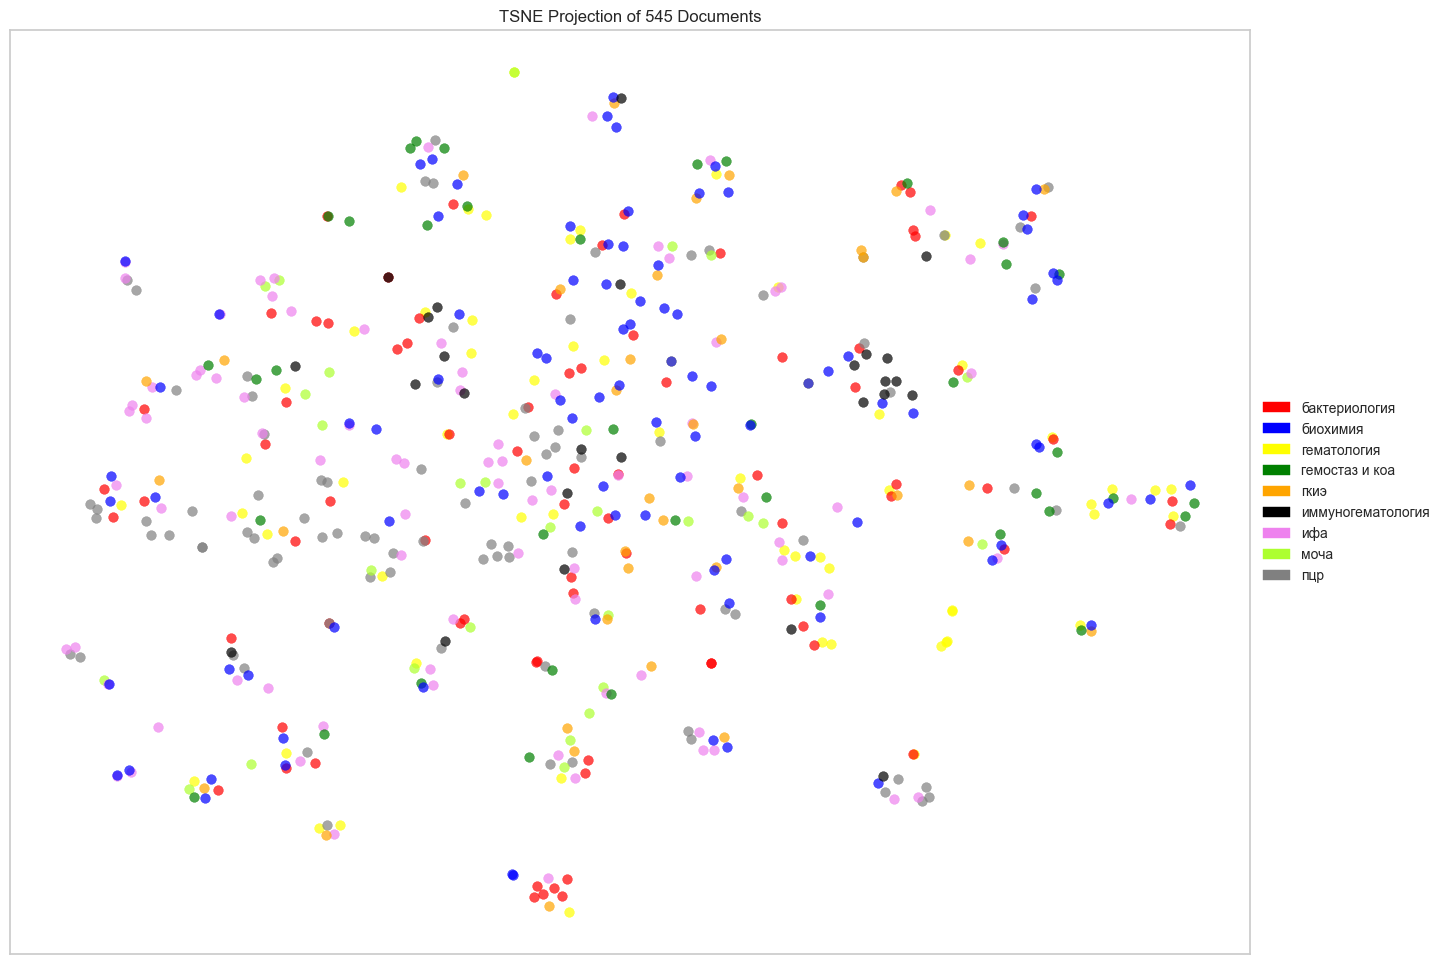

In [14]:
_, ax = plt.subplots(figsize=(20,12))
# colors for different classes
colors = [
'red', 
'blue', 
'yellow', 
'green', 
'orange', 
'black', 
'violet', 
'greenyellow', 
'gray', 
'purple',
]
x = new_train_data_tfidf #  tfidf-ed data
y = newdata["target"]  # target labels from dataset
tsne = TSNEVisualizer(ax, random_state=17, colors=colors) #, perplexity=40, init='pca', n_iter=2500
tsne.fit(x, y)
tsne.show(outpath="tsne_half_data_cut_preprocess.png")